In [1]:
# !mkdir dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
# import seaborn as sns
import os.path as path
import os
# import matplotlib
# import matplotlib.font_manager
# import matplotlib.pyplot as plt # graphs plotting
# import Bio
from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# from matplotlib import rc
# # for Arial typefont
# matplotlib.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean

import seaborn as sns

import itertools
from itertools import product

## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# matplotlib.rcParams['mathtext.fontset'] = 'cm'

## for LaTeX typefont
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'

## for another LaTeX typefont
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# rc('text', usetex = True)

print("done")

done


In [2]:
# %cd E:/RA/Federated_Learning/Code/Human-Activity-Recognition-main/dataset

In [3]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
# !unzip UCI\ HAR\ Dataset.zip

In [4]:
# !pip install scikit-plot

In [5]:
# final_seq = []
# final_attr = []

# data = np.load("E:/RA/Federated_Learning/Dataset/1k_samples_B_1_351.npy")
# for i in range(len(data)):
#     final_seq.append(data[i])
#     final_attr.append("B.1.351")
    
# data = np.load("E:/RA/Federated_Learning/Dataset/1k_samples_B_1_427.npy")
# for i in range(len(data)):
#     final_seq.append(data[i])
#     final_attr.append("B.1.427")
    
# data = np.load("E:/RA/Federated_Learning/Dataset/1k_samples_B_1_429.npy")
# for i in range(len(data)):
#     final_seq.append(data[i])
#     final_attr.append("B.1.429")
    
# data = np.load("E:/RA/Federated_Learning/Dataset/1k_samples_B_1_525.npy")
# for i in range(len(data)):
#     final_seq.append(data[i])
#     final_attr.append("B.1.525")
    
# data = np.load("E:/RA/Federated_Learning/Dataset/1k_samples_B_1_526.npy")
# for i in range(len(data)):
#     final_seq.append(data[i])
#     final_attr.append("B.1.526")
    
# data = np.load("E:/RA/Federated_Learning/Dataset/1k_samples_B_1_621.npy")
# for i in range(len(data)):
#     final_seq.append(data[i])
#     final_attr.append("B.1.621")
    
# data = np.load("E:/RA/Federated_Learning/Dataset/1k_samples_C_37.npy")
# for i in range(len(data)):
#     final_seq.append(data[i])
#     final_attr.append("C.37")
    
# data = np.load("E:/RA/Federated_Learning/Dataset/1k_samples_P_1.npy")
# for i in range(len(data)):
#     final_seq.append(data[i])
#     final_attr.append("P.1")
    
# data = np.load("E:/RA/Federated_Learning/Dataset/1k_samples_B_1_617_2.npy")
# for i in range(len(data)):
#     final_seq.append(data[i])
#     final_attr.append("B.1.617.2")
    
# np.save("E:/RA/Federated_Learning/Dataset/Final_seq_9k.npy",final_seq)
# np.save("E:/RA/Federated_Learning/Dataset/Final_variant_names_9k.npy",final_attr)

# Algorithm and Model-Architecture

<br>
<br>


<span style="font-size:1.2em;">


1. The Given Dataset is *shuffled* and divided into 4 training datasets and their corresponding 4 target variables dataset


2. Three of these datasets are used for training a Classifier model. We will be using **XGBClassifier** as the three classifier models.


3. Train a small **Neural Network model** on the output produced by these three classifier models when put into predicting of fourth dataset and thus training the neural network using the fourth part of dataset


4. Predicting on the testing data by passing the testing data through the above pipeline and producing the final predictions.


5. Evaluation of the model and results produced by the model.


The following figure explains the approach:

</span>

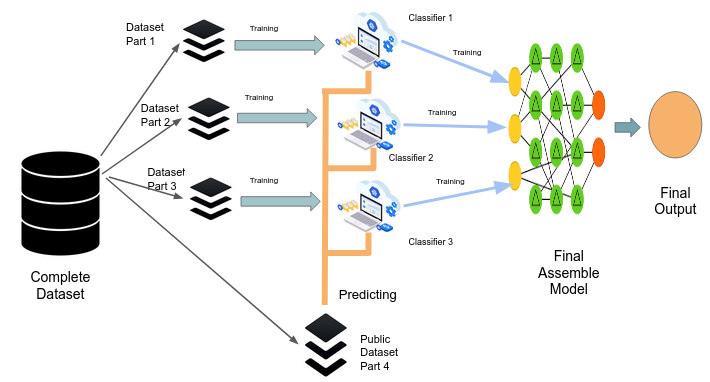

## Step 2: Importing Required Libraries


In [12]:
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers.core import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import ShuffleSplit, learning_curve
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
X = np.load("E:/RA/Federated_Learning/Dataset/Final_seq_9k.npy")
attribute_data = np.load("E:/RA/Federated_Learning/Dataset/Final_variant_names_9k.npy")



variants_val = np.unique(attribute_data)

for i in variants_val:
    min_val = 100
    max_val = 0
    avg_val = 0
    counter = 0
    for j in range(len(attribute_data)):
        if attribute_data[j]== i:
            counter = counter+1
            seq_tmp = X[j]
            avg_val = avg_val + len(seq_tmp)
            if len(seq_tmp)>max_val:
                max_val = len(seq_tmp)
            elif len(seq_tmp)<min_val:
                min_val = len(seq_tmp)
    avg_val = avg_val/counter
    print("Variant: ",i,", ", min_val, " & ", max_val, " & ", avg_val)

Variant:  B.1.351 ,  9  &  1274  &  1260.464
Variant:  B.1.427 ,  100  &  1274  &  1272.18
Variant:  B.1.429 ,  100  &  1277  &  1271.931
Variant:  B.1.525 ,  32  &  1273  &  1257.191
Variant:  B.1.526 ,  9  &  1273  &  1266.629
Variant:  B.1.617.2 ,  99  &  1273  &  1265.124
Variant:  B.1.621 ,  9  &  1275  &  1255.935
Variant:  C.37 ,  86  &  1273  &  1248.556
Variant:  P.1 ,  99  &  1274  &  1270.458


## Step 4: Loading the Training data-set

In [14]:
# X_train, Y_train = get_data(train=True)
# X_train, Y_train = shuffle(X_train, Y_train)

from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit

# X = np.load("E:/RA/IJCAI/Dataset/Original/first_pssm2vec_7000.npy")
X = np.load("E:/RA/Federated_Learning/Dataset/Final_OHE_9k.npy")
attribute_data = np.load("E:/RA/Federated_Learning/Dataset/Final_variant_names_9k.npy")

attr_new = []
for i in range(len(attribute_data)):
    aa = str(attribute_data[i]).replace("[","")
    aa_1 = aa.replace("]","")
    aa_2 = aa_1.replace("\'","")
    attr_new.append(aa_2)

unique_hst = list(np.unique(attr_new))

int_hosts = []
for ind_unique in range(len(attr_new)):
    variant_tmp = attr_new[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

y = np.array(int_hosts[:])

sss = ShuffleSplit(n_splits=1, test_size=0.3)

sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y)) 

X_train, X_test = X[train_index], X[test_index]
Y_train, Y_test = y[train_index], y[test_index]


Attribute data preprocessing Done


In [15]:
np.unique(attr_new)

array(['B.1.351', 'B.1.427', 'B.1.429', 'B.1.525', 'B.1.526', 'B.1.617.2',
       'B.1.621', 'C.37', 'P.1'], dtype='<U9')

In [16]:
idx = pd.Index(attr_new) # creates an index which allows counting the entries easily
print('Here are all of the viral species in the dataset: \n', len(idx),"entries in total")
aq = idx.value_counts()
print(aq)

Here are all of the viral species in the dataset: 
 9000 entries in total
B.1.351      1000
B.1.427      1000
B.1.429      1000
B.1.525      1000
B.1.526      1000
B.1.621      1000
C.37         1000
P.1          1000
B.1.617.2    1000
dtype: int64


In [17]:
X_train.shape, Y_train.shape # Training data shape

((6300, 31925), (6300,))

In [18]:

# for u in range(len(Y_train)):
#     Y_train[u] = Y_train[u] -1

len_val = []
avg_length = 0
aa = np.load("E:/RA/Federated_Learning/Dataset/Final_seq_9k.npy")
for i in range(len(aa)):
    len_val.append(len(aa[i]))
    avg_length = avg_length + len(aa[i])
    
np.unique(len_val),avg_length/len(aa)

(array([   9,   12,   32,   45,   74,   86,   87,   99,  145,  156,  161,
         209,  211,  213,  224,  242,  243,  246,  248,  250,  253,  265,
         270,  276,  320,  322,  386,  545,  593,  752,  826,  846,  862,
         956,  964, 1016, 1059, 1184, 1220, 1222, 1250, 1252, 1253, 1256,
        1260, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272,
        1273, 1274, 1275, 1277]),
 1263.1631111111112)

In [19]:
total_parts = 4

each_part = X_train.shape[0]//total_parts # Dividing the Dataset into 4 equal parts
each_part

1575

In [20]:
training_list = [] # Stores training dataset of each part
target_list  = [] # Stores target variables of each part
for i in range(total_parts):
    training_list.append(X_train[i: (i+1)*each_part][:][:])
    target_list.append(Y_train[i: (i+1)*each_part][:][:])

In [21]:
training_list[0].shape, target_list[0].shape

((1575, 31925), (1575,))

## Step 5: Training the Classifier Models

<br>
<br>
<span style="font-size:1.2em;">

1. We will use `XGBClassifier` for training the first three parts of the datasets and tuning them by visualizing the learning curves.

    * The **XGBoost** stands for eXtreme Gradient Boosting, which is a boosting algorithm based on gradient boosted *decision trees algorithm*. XGBoost applies a better regularization technique to reduce overfitting, and it is one of the differences from the gradient boosting. 


2. The function `plot_learning_curve` plots the learning curve followed by the model by plotting training and cross validation scores


3. We will use `SelectFromModel` for selecting the important features from the training dataset and used the newly *picked* dataset for training the model.

    * The **SelectFromModel** is a meta-transformer for selecting features based on importance weights and used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

</span>

In [22]:
def plot_learning_curve(model, X, y, title, cv=5):
    """
    Function for plotting the learning curve of the model.

    Parameters
    ==========
  
    model : object type
        The estimator of which the learning curve is to be plotted

    X : array-like
        The dataset on which the model needs to be fitted and validated

    y : array-like
        The target variables

    title : string
        Title of the plot
  
    cv : int, cross-validation generator
        Represents Cross-Validation on dataset
    """
    train_size = np.linspace(.1, 1.0, 5)
    fig, axes = plt.subplots(1, 1, figsize=(10, 6))
    axes.set_xlabel("Training examples numbers")
    axes.set_ylabel("Accuracy")
    axes.set_title(title)
    _, train_scores, test_scores = learning_curve(model, X, y,
                      cv=cv, train_sizes=train_size)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    axes.grid()
    print("train_size:",train_size,", train_scores_mean: ",train_scores_mean)
    axes.plot(train_size, train_scores_mean, 'o-', color="orange",
                 label="Training accuracy")
    axes.plot(train_size, test_scores_mean, 'o-', color="green",
                 label="Cross-validation accuracy")
    print("valid_size:",train_size,", valid_scores_mean: ",test_scores_mean)
    axes.legend(loc="lower right")

    return plt

In [23]:
# sfm.transform(training_list[i])

------------- Training for model 1 ---------------
train_size: [0.1   0.325 0.55  0.775 1.   ] , train_scores_mean:  [0.97936508 0.97457213 0.97604618 0.97295082 0.97015873]
valid_size: [0.1   0.325 0.55  0.775 1.   ] , valid_scores_mean:  [0.86349206 0.89460317 0.90412698 0.90984127 0.91492063]


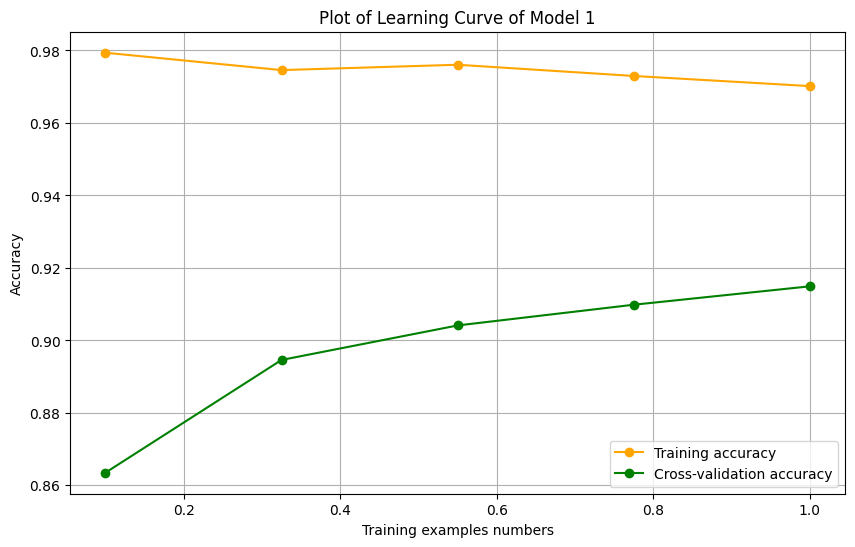


------------- Completed Training for model 1 ------------
------------- Training for model 2 ---------------
train_size: [0.1   0.325 0.55  0.775 1.   ] , train_scores_mean:  [0.987251   0.97212714 0.96924188 0.96803279 0.96673283]
valid_size: [0.1   0.325 0.55  0.775 1.   ] , valid_scores_mean:  [0.88059707 0.90854014 0.91647816 0.91775153 0.91806798]


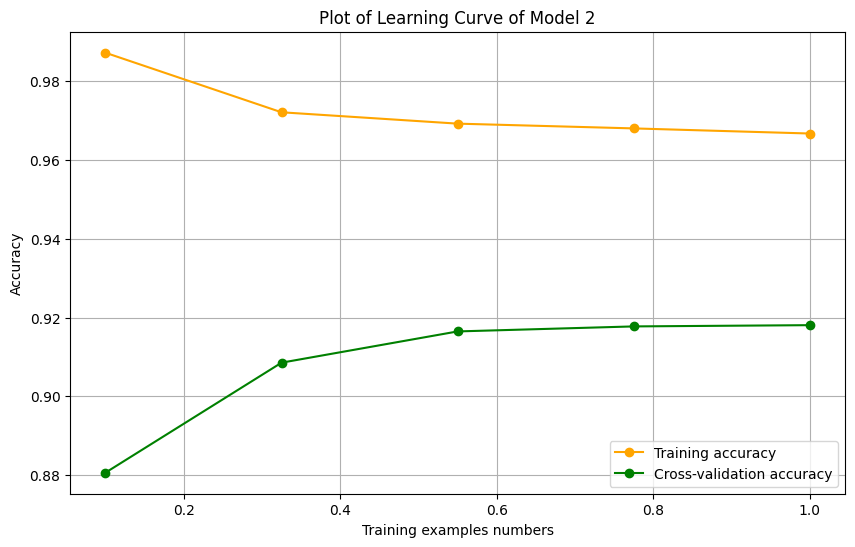


------------- Completed Training for model 2 ------------
------------- Training for model 3 ---------------
train_size: [0.1   0.325 0.55  0.775 1.   ] , train_scores_mean:  [0.97506631 0.96919315 0.96706789 0.96850017 0.96844891]
valid_size: [0.1   0.325 0.55  0.775 1.   ] , valid_scores_mean:  [0.88778271 0.91805757 0.92250673 0.92187136 0.92271612]


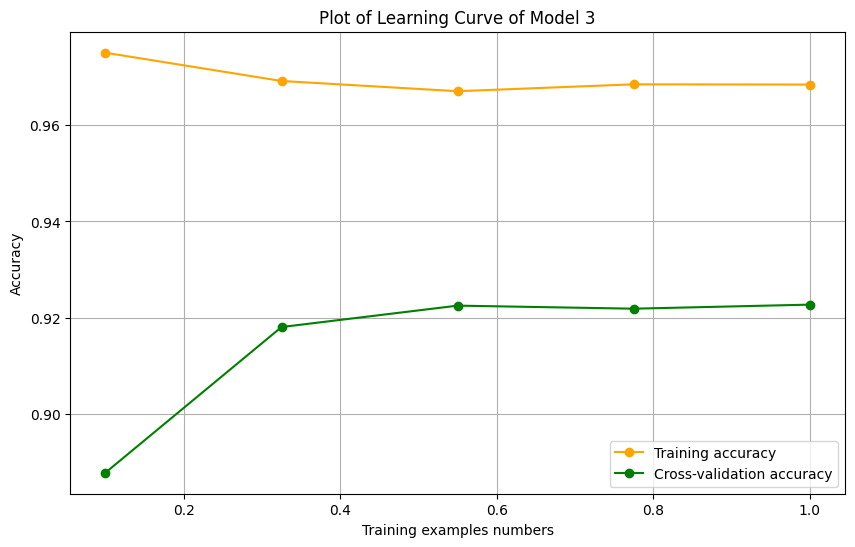


------------- Completed Training for model 3 ------------


In [24]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model_list = [] # Contains the 3 models
transforms = [] # Contains transforms for data dimesions reduction for each model
plots = [] # Contains the plot object of each model's learning curve



for i in range(total_parts-1):
    print("------------- Training for model %s ---------------" % str(i+1))
#     classifier_used = XGBClassifier()
    classifier_used = LogisticRegression(solver='liblinear', random_state=0)
#     classifier_used = svm.SVC(kernel='linear',probability=True) # Linear Kernel
#     classifier_used = RandomForestClassifier(n_estimators = 100)
    
    clf  = classifier_used
    clf.fit(training_list[i], target_list[i])
    sfm = SelectFromModel(clf, prefit=True)
    transforms.append(sfm)
    
#     classifier_used = XGBClassifier()
    classifier_used = LogisticRegression(solver='liblinear', random_state=0)
#     classifier_used = svm.SVC(kernel='linear',probability=True) # Linear Kernel
#     classifier_used = RandomForestClassifier(n_estimators = 100)
    
    clf = classifier_used
    clf.fit(sfm.transform(training_list[i]), target_list[i])
    model_list.append(clf)
    title = "Plot of Learning Curve of Model %s" % str(i+1)
    plt = plot_learning_curve(clf, sfm.transform(training_list[i]), target_list[i], title)
    plt.show()
    plots.append(plt)
    print()
    print("------------- Completed Training for model %s ------------" % str(i+1))

train_size: [0.1   0.325 0.55  0.775 1.   ] , train_scores_mean:  [0.97506631 0.96919315 0.96706789 0.96850017 0.96844891]
valid_size: [0.1   0.325 0.55  0.775 1.   ] , valid_scores_mean:  [0.88778271 0.91805757 0.92250673 0.92187136 0.92271612]


<module 'matplotlib.pyplot' from 'C:\\Users\\sali85\\Anaconda3\\envs\\New_Env_2\\lib\\site-packages\\matplotlib\\pyplot.py'>

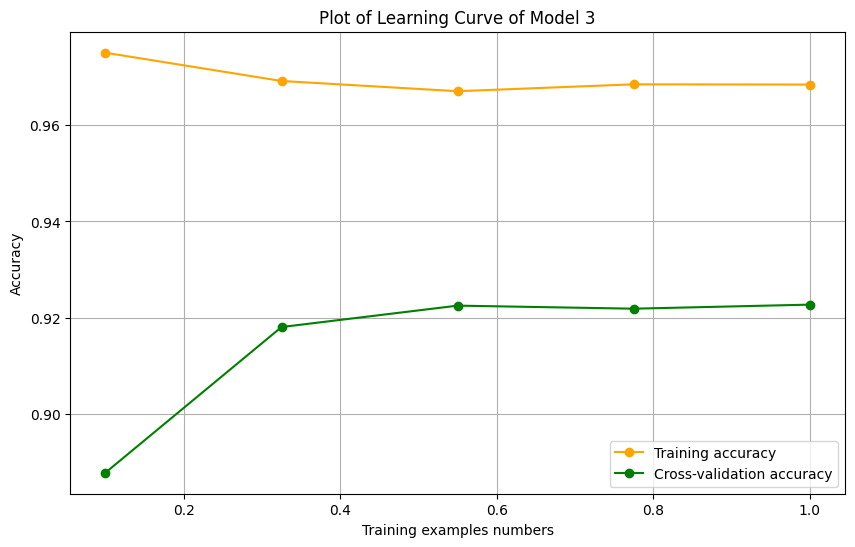

In [25]:
i=2
plot_learning_curve(clf, sfm.transform(training_list[i]), target_list[i], title)

## Step 6: Training the Assemble model (Neural Network)

<br>
<br>
<span style="font-size:1.2em;">

1. The function `stacked_training` helps in preparing the data that will be feeded into the neural network for training. The neural network is trained based on the outputs produced by the three models.
    
    * The main function of the neural network model here is to learn the **weight-function** of the inputs fed by the three classifier models and use it for further predictions.


2. The function `assemble_model` prepares a neural network and then trains based on the output of `stacked_training` and the corresponding target variables
</span>

In [26]:
def stacked_training(X):
  """
  This functions stacks the probability vectors that are generated
  from the prediction of each model
  Example:
    Here we have 3 models, `n` samples and 6 classes. Therefore each model will
    produce (n, 6) array of probability prediction, then Horizontal stacking will
    produce (n, 6*3) array of probability prediciton which will be further used
    as the input for assemble model.
  
  Parameters
  ==========

  X: array-like
    Dataset will be predicted on each model of model_list
  
  Returns
  =======

  output: array-like
    Return an array of appropiate dimension for further training of assemble model
  """
  X_stacked = []
  for i in range(0, len(model_list)):
    X_stacked.append(model_list[i].predict_proba(transforms[i].transform(X)))
  return np.hstack(X_stacked)

In [27]:
def assemble_model(X, Y,epoch_val,batch_size_val):
    """
    This functions creates a small assemble model which is trained on the
    output produced by the models of the model_list

    Parameters
    ==========

    X: array-like
    Dataset used for training the assemble model
    y: array-like
    Target variables

    Returns
    =======

    The history of model fitting and the trained model
    """
    X = stacked_training(X)
    #Y = to_categorical(Y-1)
    Y = to_categorical(Y)
    
    print("Input vector length: ",X[0].shape)
    batch_size = batch_size_val
    epochs = epoch_val
    model = Sequential()
#     model.add(Dense(128, input_shape=X[0].shape, activation='relu'))
#     model.add(Dense(32, activation='relu'))
    model.add(Dense(25, input_shape=X[0].shape, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(9, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X, Y,
                      batch_size=batch_size,
                      epochs=epochs
                      )
    return history, model

In [28]:
# assemble_model(training_list[total_parts-1], target_list[total_parts-1],1,batch_size_val) 
stacked_training(training_list[total_parts-1]).shape

(6297, 27)

In [29]:
training_list[total_parts-1].shape

(6297, 31925)

In [30]:
# Training on the 4th part of dataset

epoch_val = 100
batch_size_val = 16

final_model_history, final_model = assemble_model(training_list[total_parts-1], target_list[total_parts-1],epoch_val,batch_size_val) 

Input vector length:  (27,)
Epoch 1/100
394/394 [==============================] - 1s 2ms/step - loss: 0.8146 - accuracy: 0.8372
Epoch 2/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1212 - accuracy: 0.9489
Epoch 3/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1076 - accuracy: 0.9524
Epoch 4/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1044 - accuracy: 0.9536
Epoch 5/100
394/394 [==============================] - 0s 1ms/step - loss: 0.1036 - accuracy: 0.9525
Epoch 6/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9557
Epoch 7/100
394/394 [==============================] - 1s 2ms/step - loss: 0.0997 - accuracy: 0.9539
Epoch 8/100
394/394 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 0.9535
Epoch 9/100
394/394 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9559
Epoch 10/100
394/394 [==============================] - 1s 2ms/

394/394 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.9578
Epoch 82/100
394/394 [==============================] - 1s 2ms/step - loss: 0.0914 - accuracy: 0.9570
Epoch 83/100
394/394 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9574
Epoch 84/100
394/394 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9581
Epoch 85/100
394/394 [==============================] - 1s 3ms/step - loss: 0.0918 - accuracy: 0.9574
Epoch 86/100
394/394 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9571
Epoch 87/100
394/394 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9576
Epoch 88/100
394/394 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9566
Epoch 89/100
394/394 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.9570
Epoch 90/100
394/394 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 

In [31]:
# final_model.get_config() 
# from keras.utils.vis_utils import plot_model  
import os #os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

plot_model(final_model, show_shapes=True, show_layer_names=True)

NameError: name 'plot_model' is not defined

In [85]:
# !pip install graphviz

In [32]:
# !pip install graphviz
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                700       
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 9)                 144       
                                                                 
Total params: 1,234
Trainable params: 1,234
Non-trainable params: 0
_________________________________________________________________


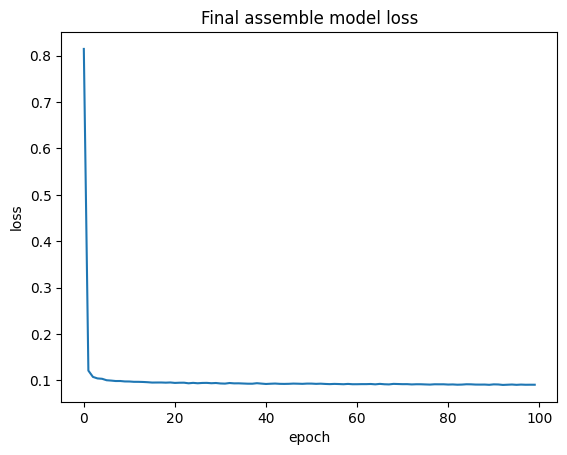

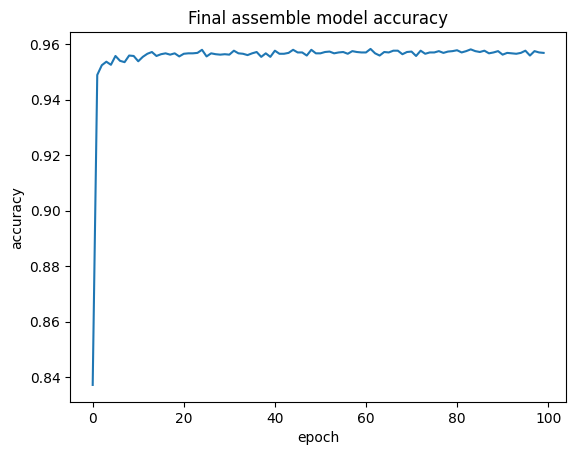

In [33]:
# Plotting the loss and accuracy of the final assemble model
plt.plot(final_model_history.history['loss'])
plt.title('Final assemble model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.plot(final_model_history.history['accuracy'])
plt.title('Final assemble model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Step 7: Predictions on Testing Data

<br>
<br>
<span style="font-size:1.2em;">

1. The function `predict_assemble_model` helps in producing the predictions of the testing data using the complete model architecture pipeline generated and returns the true values, final predictions, probability predictions and the accuracy score on the test data.
</span>

In [88]:
# X_final_test, Y_final_test = get_data(train=False)
# X_final_test.shape, Y_final_test.shape

In [34]:
def predict_assemble_model(model, X_test, Y_test):
  """
  This functions helps in predicting from testing data

  Parameters
  ==========

  model: assemble model

  X_test: array-like
    Dataset that is to be predicted from assemble model
  
  Y_test: array-like
    True value of target variables
  
  Returns
  =======

  Returns the true value of target variables, probability of predictions,
  predicted value and accuracy
  """
  X_test = stacked_training(X_test)
  Y_pred = model.predict(X_test)
  Y_pred_proba = Y_pred.copy()
  Y_pred = np.argmax(Y_pred, axis=1)+1
  return Y_test, Y_pred, Y_pred_proba,accuracy_score(Y_test, Y_pred)

In [35]:
X_train, X_test = X[train_index], X[test_index]
Y_train, Y_test = y[train_index], y[test_index]

X_test.shape

(2700, 31925)

In [36]:
aaa = np.array(attr_new)
idx = pd.Index(aaa[test_index]) # creates an index which allows counting the entries easily
print('Here are all of the viral species in the dataset: \n', len(idx),"entries in total")
aq = idx.value_counts()
print(aq)

Here are all of the viral species in the dataset: 
 2700 entries in total
B.1.429      321
B.1.526      310
C.37         306
B.1.427      305
B.1.351      302
B.1.621      298
B.1.617.2    293
B.1.525      289
P.1          276
dtype: int64


In [37]:
X_test = stacked_training(X_test)
Y_pred = final_model.predict(X_test)
Y_pred_proba = Y_pred.copy()
Y_pred = np.argmax(Y_pred, axis=1)

Y_pred

85/85 [==============================] - 0s 1ms/step


array([7, 1, 8, ..., 4, 2, 6], dtype=int64)

In [38]:
# aaa = np.array(attr_new)
idx = pd.Index(Y_pred) # creates an index which allows counting the entries easily
print('Here are all of the viral species in the dataset: \n', len(idx),"entries in total")
aq = idx.value_counts()
print(aq)

Here are all of the viral species in the dataset: 
 2700 entries in total
2    393
4    311
7    306
0    304
5    297
6    296
3    286
8    273
1    234
dtype: int64


In [39]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from numpy import mean
from pandas import DataFrame

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
#         print("Unique Class: ",per_class)
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
    
    
    check = pd.DataFrame(roc_auc_dict.items())
    return mean(check)

In [40]:
from sklearn.metrics import confusion_matrix

y_pred_new = Y_pred

test_set = np.array(Y_test)
svm_acc = metrics.accuracy_score(test_set, y_pred_new)    
svm_prec = metrics.precision_score(test_set, y_pred_new,average='weighted')
svm_recall = metrics.recall_score(test_set, y_pred_new,average='weighted')
svm_f1_weighted = metrics.f1_score(test_set, y_pred_new,average='weighted')
svm_f1_macro = metrics.f1_score(test_set, y_pred_new,average='macro')
svm_f1_micro = metrics.f1_score(test_set, y_pred_new,average='micro')
confuse = confusion_matrix(test_set, y_pred_new)
#     print("Confusion Matrix SVM : \n", confuse)
#     print("SVM Kernel Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
######################## Compute ROC curve and ROC area for each class ################
y_prob = y_pred_new
macro_roc_auc_ovo = roc_auc_score_multiclass(test_set, y_prob, average='macro')
#    print(macro_roc_auc_ovo[1])
check = [svm_acc,svm_prec,svm_recall,svm_f1_weighted,svm_f1_macro,macro_roc_auc_ovo[1]]
pd.DataFrame(check,index=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","ROC AUC"])


C:\Users\sali85\Anaconda3\envs\New_Env_2\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,0
Accuracy,0.919259
Precision,0.921208
Recall,0.919259
F1 (weighted),0.918129
F1 (Macro),0.921044
ROC AUC,0.955736


In [41]:
from sklearn.metrics import confusion_matrix

y_pred_new = Y_pred

test_set = np.array(Y_test)
svm_acc = metrics.accuracy_score(test_set, y_pred_new)    
svm_prec = metrics.precision_score(test_set, y_pred_new,average='weighted')
svm_recall = metrics.recall_score(test_set, y_pred_new,average='weighted')
svm_f1_weighted = metrics.f1_score(test_set, y_pred_new,average='weighted')
svm_f1_macro = metrics.f1_score(test_set, y_pred_new,average='macro')
svm_f1_micro = metrics.f1_score(test_set, y_pred_new,average='micro')
confuse = confusion_matrix(test_set, y_pred_new)
#     print("Confusion Matrix SVM : \n", confuse)
#     print("SVM Kernel Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
######################## Compute ROC curve and ROC area for each class ################
y_prob = y_pred_new
macro_roc_auc_ovo = roc_auc_score_multiclass(test_set, y_prob, average='macro')
#    print(macro_roc_auc_ovo[1])
check = [svm_acc,svm_prec,svm_recall,svm_f1_weighted,svm_f1_macro,macro_roc_auc_ovo[1]]
pd.DataFrame(check,index=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","ROC AUC"])


C:\Users\sali85\Anaconda3\envs\New_Env_2\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,0
Accuracy,0.919259
Precision,0.921208
Recall,0.919259
F1 (weighted),0.918129
F1 (Macro),0.921044
ROC AUC,0.955736


In [42]:
# Y_true, Y_pred, Y_pred_proba, accuracy = predict_assemble_model(final_model, X_test, Y_test)
# print("The final accuracy obtained by the overall model architecture is: ", accuracy*100)

## Step 8: Evaluations

<br>
<br>
<span style="font-size:1.2em;">

1. The function `draw_confusion_matrix` helps to produce the produce the confusion matrix of the overall predictions and their true values.
    * A **confusion matrix** is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known
</span>

In [43]:
ACTIVITIES = {
    0: 'B.1.351',
    1: 'B.1.427',
    2: 'B.1.429',
    3: 'B.1.525',
    4: 'B.1.526',
    5: 'B.1.617.2',
    6: 'B.1.621',
    7: 'C.37',
    8: 'P.1'
}

def draw_confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in Y_true])
    Y_pred = pd.Series([ACTIVITIES[y] for y in Y_pred])
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [44]:
confusion_matrix = draw_confusion_matrix(Y_test, y_pred_new)
confusion_matrix

Pred,B.1.351,B.1.427,B.1.429,B.1.525,B.1.526,B.1.617.2,B.1.621,C.37,P.1
True,,,,,,,,,
B.1.351,302,0,0,0,0,0,0,0,0
B.1.427,0,166,138,0,1,0,0,0,0
B.1.429,1,67,252,1,0,0,0,0,0
B.1.525,0,0,1,285,0,3,0,0,0
B.1.526,0,1,0,0,309,0,0,0,0
B.1.617.2,0,0,0,0,0,293,0,0,0
B.1.621,0,0,0,0,1,1,296,0,0
C.37,0,0,0,0,0,0,0,306,0
P.1,1,0,2,0,0,0,0,0,273


In [ ]:
# skplt.metrics.plot_confusion_matrix(Y_true, Y_pred, normalize=True, figsize=(8, 8)) # Plotting Normalized Confusion Matrix


### Classfication report

<br>

<span style="font-size:1.2em;">
 
* A **Classification report** is used to measure the quality of predictions from a classification algorithm. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report 
 </span>

In [161]:
print(classification_report(Y_test, y_pred_new, target_names=list(ACTIVITIES.values())))

              precision    recall  f1-score   support

     B.1.351       0.99      0.97      0.98       291
     B.1.427       0.78      0.55      0.64       317
     B.1.429       0.65      0.84      0.73       319
     B.1.525       0.99      0.99      0.99       290
     B.1.526       0.96      1.00      0.98       298
   B.1.617.2       0.99      1.00      0.99       283
     B.1.621       1.00      0.99      1.00       298
        C.37       1.00      0.99      0.99       300
         P.1       1.00      1.00      1.00       304

    accuracy                           0.92      2700
   macro avg       0.93      0.92      0.92      2700
weighted avg       0.92      0.92      0.92      2700



### ROC Curve

<br>
<span style="font-size:1.2em;">

* An **ROC curve** (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    1. True Positive Rate
    2. False Positive Rate
</span>

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

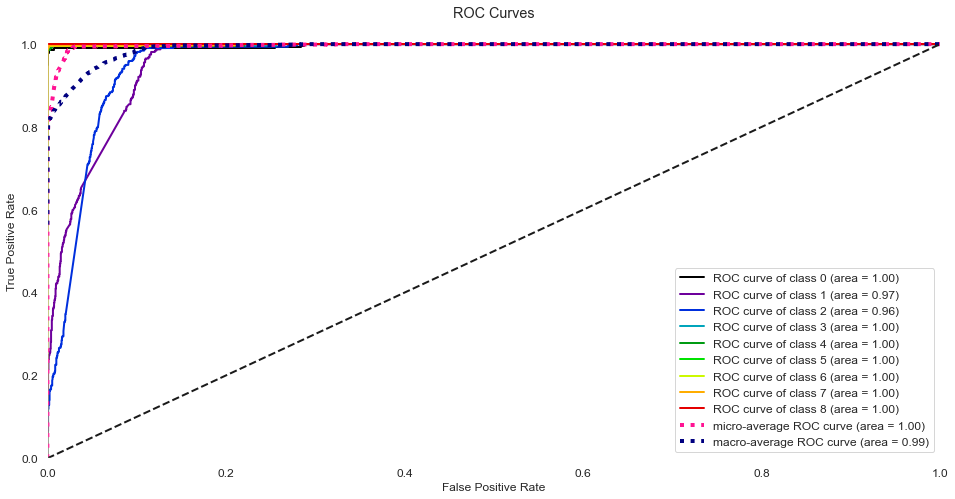

In [166]:
skplt.metrics.plot_roc(Y_test, Y_pred_proba, text_fontsize="medium", figsize=(16, 8))  # Plot the ROC curve

# t-SNE Plots

In [148]:
from sklearn.manifold import TSNE


dataset_val = np.load("E:/RA/Federated_Learning/Dataset/Final_kernel_approximate_Embedding_9k_seq.npy")
attr_val = np.load("E:/RA/Federated_Learning/Dataset/Final_variant_names_9k.npy")

# We embed all our sequences into 2D vectors with help of TSNE
X_embedded_orig = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(dataset_val)


C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


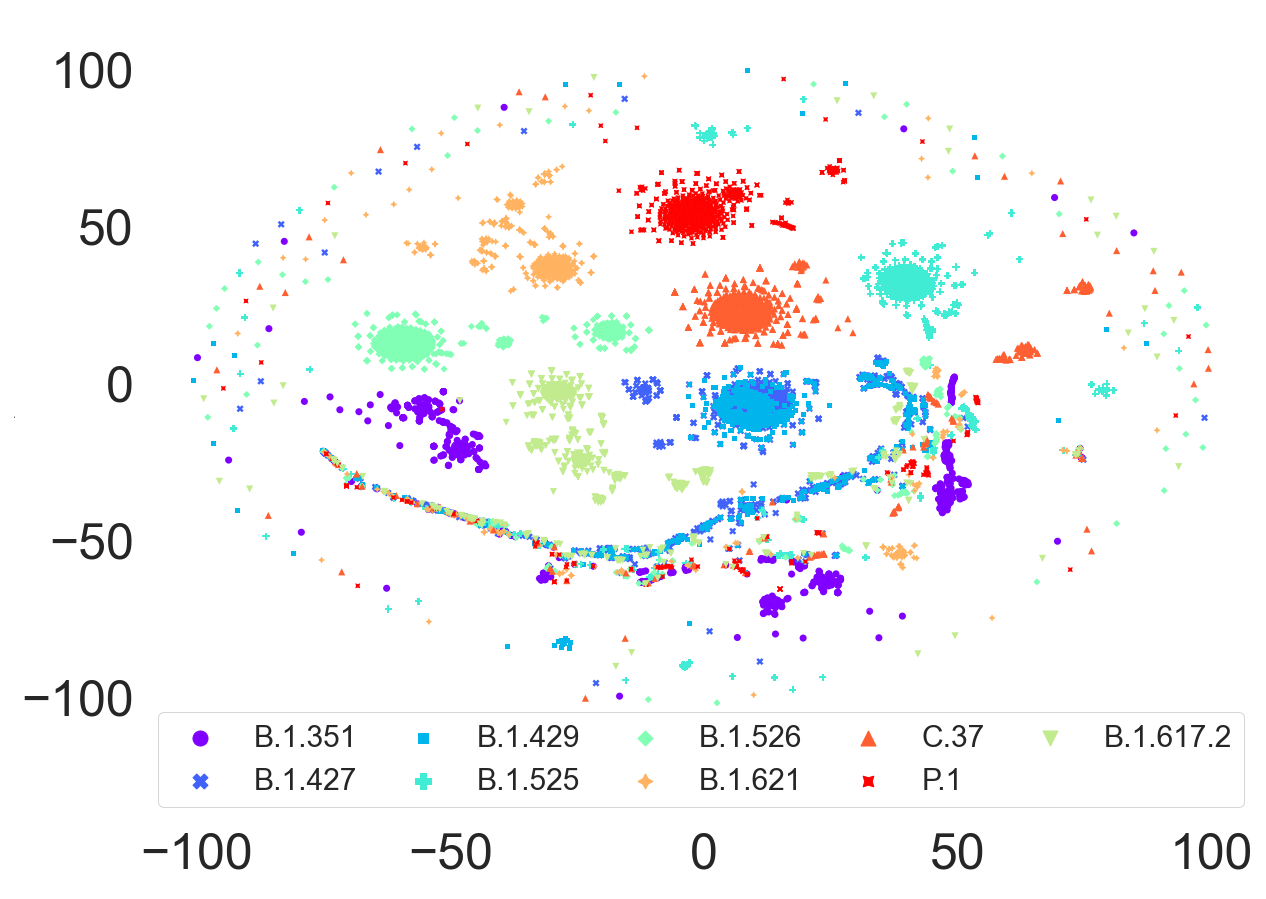

In [149]:
import matplotlib.cm as cm
az = attr_val[:]
# az = month_names_few_final
# X_embedded_orig_final2 = np.array(X_embedded)
X_embedded_orig_final2 = np.array(X_embedded_orig)

colors = cm.rainbow(np.linspace(0, 1, len(np.unique(az))))
len(np.unique(az))

hst = np.unique(az)
order_top_hosts =  az

# colors_top_hosts = {hst[0] : colors[0], hst[1] : colors[1],
#                       hst[2] : colors[2], hst[3]: colors[3],  
#                       hst[4] : colors[4], hst[5]:colors[5], hst[6]:colors[6], 
#                     hst[7]:colors[7], hst[8]:colors[8]
# }
colors_top_hosts = {hst[0] : colors[0], hst[1] : colors[1],
                      hst[2] : colors[2], hst[3]: colors[3],  
                      hst[4] : colors[4], hst[5]:colors[5], hst[6]:colors[6], 
                    hst[7]:colors[7],hst[8]:colors[8]
}


data_frame_top_hosts = pd.DataFrame({' ': 
                                   np.array(X_embedded_orig_final2[:,0]), 
                           '.': np.array(X_embedded_orig_final2[:,1]), 
                           'Variants:': az})

# sns.set(rc={'figure.figsize':(20,15)})

sns.set(rc={'figure.figsize':(20,15), 'axes.facecolor':'white'})

sns.scatterplot(x = ' ', 
            y = '.', 
            hue = 'Variants:', 
            hue_order = order_top_hosts,
#             markers = ordered_markers_top_hosts,
            palette = colors_top_hosts,
            data = data_frame_top_hosts,           
#             legend = 'full',
#             ax = ax12,
            s = 50,
            linewidth=0.01,
            style = 'Variants:')
plt.ylim(-140, 120)
# plt.xlim(-80, 80)
# plt.xlabel("Steps Taken Per Day", fontsize=14)
# plt.ylabel("Calories Burned Per Day", fontsize=14)
plt.tick_params(labelsize=50)



lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=30, mode = "expand", ncol = 5)
for handle in lgnd.legendHandles:
    handle.set_sizes([226.0])

write_path = "E:/RA/Federated_Learning/Plots/kernel_Approx_tnse_plot.png"

plt.savefig(write_path)

In [104]:
import numpy as np
from scipy.stats import ttest_ind

v1 = [np.random.normal(size=5),np.random.normal(size=5)]
v2 = [np.random.normal(size=5),np.random.normal(size=5)]

res = ttest_ind(v1, v1).pvalue

print(res)

[1. 1. 1. 1. 1.]
